In [28]:
import longitudinal as lde
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


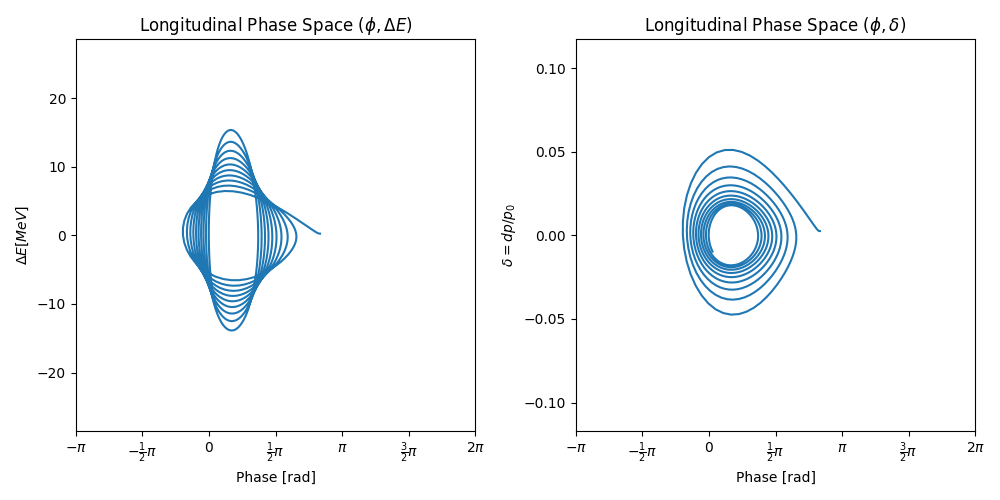

In [33]:
turns=1000
sin_phi_s=0.5

mass=0.938e9
beam_energy=50e6+mass
p0=np.sqrt(beam_energy*beam_energy-mass*mass)
harm=1
voltage=1e6
mcf=0.25
update_eta=True
# Gamma and Betas 
gamma=beam_energy/mass
eta=mcf-1/gamma/gamma
beta=np.sqrt(1-1/gamma/gamma)

# Calculate the bucket height
phi_s=np.arcsin(sin_phi_s)
yf=np.sqrt(np.cos(phi_s)-(np.pi-2*phi_s)*np.sin(phi_s)/2)
height=2*np.sqrt(voltage/2/np.pi/beta/beta/beam_energy/harm/np.abs(eta))*yf
#print(height)


phi_0=np.pi-phi_s
#phi_0=phi_s
delta_E=.5e6 ## MeV
delta_P=np.sqrt((beam_energy+delta_E)*(beam_energy+delta_E)-mass*mass)/p0-1
# Use phi-delta phase space
npar=1
initial_phi=np.ones(npar)*(phi_0)
initial_de=np.linspace(0.5,1, npar)*delta_E

result=lde.longitudinal_evolve(turns, 
                                       initial_phi,
                                       initial_de,
                                       sin_phi_s=sin_phi_s, alphac=mcf, E0_ini=beam_energy,
                                       mass=mass, e_volt=voltage, harm=harm,
                                       update_eta=update_eta, energy_change=True,
                                      )

fig,(ax1,ax2)=plt.subplots(1,2, figsize=(10,5))
ax1.set_title(r"Longitudinal Phase Space $(\phi,\Delta E)$")
ax2.set_title(r"Longitudinal Phase Space $(\phi,\delta)$")
ax1.set_xlabel('Phase [rad]')
ax2.set_xlabel('Phase [rad]')
ax1.set_ylabel(r'$\Delta E [MeV]$')
ax2.set_ylabel(r'$\delta=dp/p_0$')

#ax1.set_xlim([-np.pi,np.pi])
ax1.set_ylim([-5*height*beam_energy*beta*beta/1e6,5*height*beta*beta*beam_energy/1e6])
ax2.set_ylim([-2*height,2*height])

#ax1.set_prop_cycle(plt.cycler('color', plt.cm.Oranges(np.linspace(0, 1, 8))))
ax1.plot(result[0], result[1]/1e6, linestyle=None)
#x2.set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0, 1, 8))))
ax2.plot(result[0], result[2], linestyle=None)

for ax in (ax1,ax2):
    ax.set_xticks([-np.pi, -0.5*np.pi, 0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
    ax.set_xticklabels([r"$-\pi$", r"$-\frac{1}{2}\pi$", "$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])
    ax.set_xlim([-np.pi,2*np.pi])
plt.tight_layout()
 